<a href="https://colab.research.google.com/github/prakanshurockss/classifier-model_intern_Task/blob/main/classifier_model_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas-profiling==2.7.1 

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 3.1MB 4.8MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 1.1MB 19.9MB/s 
     |████████████████████████████████| 296kB 25.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=fefa7b2b2de1708235485712e653223c8f580de05ca49b0781f7ddc2f1795c43
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=06f9b98f8dda7f53e1b15090f98180a7acd7c27a4ef49d38880903f5ec7d92b5
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing ins

In [5]:
import pandas as pd
import pandas_profiling
import numpy as np
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [7]:
df=pd.read_csv('training_data.csv')
print(df)


      patient_id standard_lab_parameter_name  parameter_value      unit  \
0              0                         WBC           579.00   10^3/μl   
1              1                          T4             5.00     μg/dl   
2              2                         WBC             6.81   10^3/μl   
3              3                          T4             5.70     μg/dl   
4              4                         WBC             4.64   10^3/μl   
...          ...                         ...              ...       ...   
9995        9995                         WBC             9.14   10^3/μl   
9996        9996                         WBC             4.90  thou/mm3   
9997        9997                          T4             9.80     μg/dl   
9998        9998                         WBC             4.93   10^3/μl   
9999        9999                          T4             6.00     μg/dl   

                            created_at  reference_high  reference_low  \
0              2019-07-02 

In [40]:
#generate profile report
profile= ProfileReport(df)
profile.to_file(output_file="profile1.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Read in data and display first 5 rows
features = pd.read_csv('training_data.csv')
test_file_data= pd.read_csv('test_data.csv')
print(features.head(5))


   patient_id standard_lab_parameter_name  parameter_value     unit  \
0           0                         WBC           579.00  10^3/μl   
1           1                          T4             5.00    μg/dl   
2           2                         WBC             6.81  10^3/μl   
3           3                          T4             5.70    μg/dl   
4           4                         WBC             4.64  10^3/μl   

                         created_at  reference_high  reference_low age_group  \
0           2019-07-02 01:19:03.581            10.0            4.0       old   
1           2019-07-02 01:19:03.581            12.0            4.5       old   
2           2019-05-06 14:07:51.925            10.0            4.0     adult   
3           2019-05-06 14:07:51.925            12.0            4.5     adult   
4  2019-07-21 13:41:00.528523+00:00            10.0            4.0     adult   

  gender  
0   male  
1   male  
2   male  
3   male  
4   male  


In [9]:
features=features.drop(['unit','patient_id','created_at'],axis=1)

In [10]:
features.head(5)

,standard_lab_parameter_name,parameter_value,reference_high,reference_low,age_group,gender
0,WBC,579.00,10.0,4.0,old,male
1,T4,5.00,12.0,4.5,old,male
2,WBC,6.81,10.0,4.0,adult,male
3,T4,5.70,12.0,4.5,adult,male
4,WBC,4.64,10.0,4.0,adult,male


In [11]:
print('The shape of our features is:', features.shape)

The shape of our features is: (10000, 6)


In [12]:
# Descriptive statistics for each column
features.describe()

,parameter_value,reference_high,reference_low
count,10000.000000,10000.000000,10000.000000
mean,356.897325,372.848728,162.951938
std,9289.389443,1800.575300,712.506331
min,-71.000000,1.120000,0.000000
25%,6.700000,10.000000,4.000000
50%,8.830000,12.000000,4.500000
75%,101.000000,107.000000,98.000000
max,920000.000000,15000.000000,5000.000000


In [13]:
print(features.values)

[['WBC' 579.0 10.0 4.0 'old' 'male']
 ['T4' 5.0 12.0 4.5 'old' 'male']
 ['WBC' 6.81 10.0 4.0 'adult' 'male']
 ...
 ['T4' 9.8 12.0 4.5 'old' 'male']
 ['WBC' 4.93 10.0 4.0 'old' 'male']
 ['T4' 6.0 12.0 4.5 'adult' 'male']]


In [14]:
gender_list = features['gender'].unique().tolist()


In [15]:
gender_list

['male', 'female', 'Female', 'mAle']

In [16]:
features["gender"] = features["gender"].str.lower()

In [17]:
gender_list_new=features['gender'].unique().tolist()
print(gender_list_new)

['male', 'female']


In [18]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
features['gender']= label_encoder.fit_transform(features['gender'])
  
features['gender'].unique()

array([1, 0])

In [19]:
labels = np.array(features['gender'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('gender', axis = 1)

In [ ]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
features_encoded = pd.get_dummies(features)

In [21]:
features_encoded.head(5)

,parameter_value,reference_high,reference_low,standard_lab_parameter_name_Chloride,standard_lab_parameter_name_SGPT,standard_lab_parameter_name_Sodium,standard_lab_parameter_name_T4,standard_lab_parameter_name_WBC,age_group_adult,age_group_child,age_group_old,age_group_teen
0,579.00,10.0,4.0,0,0,0,0,1,0,0,1,0
1,5.00,12.0,4.5,0,0,0,1,0,0,0,1,0
2,6.81,10.0,4.0,0,0,0,0,1,1,0,0,0
3,5.70,12.0,4.5,0,0,0,1,0,1,0,0,0
4,4.64,10.0,4.0,0,0,0,0,1,1,0,0,0


In [22]:

feature_encoded_list = list(features_encoded.columns)
x_array = np.array(features_encoded)

In [23]:
x_array.shape

(10000, 12)

In [24]:
labels.shape

(10000,)

In [25]:
y_array=labels.reshape((10000,1))

In [26]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
x_train, x_test, y_train,y_test = train_test_split(x_array, y_array, test_size = 0.20, random_state = 42)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000, 1)
(2000, 1)


Using logistic regression


In [28]:
#using logistic regression
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)

logreg.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.884

Using support vector machines


In [29]:
svc = SVC()

svc.fit(x_train, y_train)

y_pred_svm = svc.predict(x_test)

svc.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.88425

using random forest


In [30]:
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True,max_features=5)

random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.920375

using gradeint boost


In [31]:
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(x_train, y_train)
y_pred_grad = grad_boost.predict(x_test)
grad_boost.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9095

predictions using test file


In [32]:
test_data=test_file_data.drop(['unit','patient_id','created_at'],axis=1)
test_data = test_data.iloc[: , 1:]
test_data_encoded = pd.get_dummies(test_data)
x_test_file = np.array(test_data_encoded)

In [33]:
test_data_encoded.head(5)

,parameter_value,reference_high,reference_low,standard_lab_parameter_name_Chloride,standard_lab_parameter_name_SGPT,standard_lab_parameter_name_Sodium,standard_lab_parameter_name_T4,standard_lab_parameter_name_WBC,age_group_adult,age_group_child,age_group_old,age_group_teen
0,8.10,10.0,4.0,0,0,0,0,1,1,0,0,0
1,13.00,12.0,4.5,0,0,0,1,0,1,0,0,0
2,7.10,12.0,4.5,0,0,0,1,0,1,0,0,0
3,5.62,10.0,4.0,0,0,0,0,1,1,0,0,0
4,9350.00,10000.0,4000.0,0,0,0,0,1,0,0,1,0


In [34]:

predictions = random_forest.predict(x_test_file)




In [35]:
print(predictions)

[1 1 1 ... 1 1 0]


In [36]:

print(label_encoder.inverse_transform(predictions)[:10])

['male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male']


Accuracy measures

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)

array([[  41,  191],
       [  53, 1715]])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_pred_rf,y_test))
print(accuracy_score(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.18      0.44      0.25        94
           1       0.97      0.90      0.93      1906

    accuracy                           0.88      2000
   macro avg       0.57      0.67      0.59      2000
weighted avg       0.93      0.88      0.90      2000

0.878


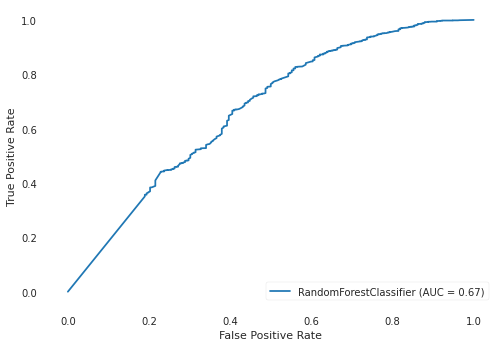

In [39]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(random_forest, x_test, y_test) 